In [4]:
import PyYAML as yaml 

with open('consts.yaml') as f:
    consts = yaml.safe_load(f)

flag = 1

#IMPORT
try:
    import graphlab as gl
    import numpy as np
    import graphlab.aggregate as agg
    import matplotlib.pyplot as plt
    from matplotlib import rcParams
    import datetime as dt   
    from graphlab import degree_counting
    from graphlab import connected_components
    from graphlab import pagerank
    from graphlab import shortest_path
    from graphlab import triangle_counting
    from graphlab import label_propagation
    from graphlab import kcore
    from graphlab import graph_coloring
    import os
    from bs4 import BeautifulSoup
    import csv
    import requests
    import urllib
    import json
    import pandas as pd
    print(consts['success'])
except:
    raise ImportError("Key libraries cannot be loaded.")

ModuleNotFoundError: No module named 'PyYAML'

In [3]:
!pip3 install PyYAML

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
try:
    transaction_data = consts['path_to_transactional_data']
    data = gl.SFrame(transaction_data)
    print(len(data))
except:
    print(consts['error'])
    

error


ERROR: Could not find a version that satisfies the requirement yaml (from versions: none)
ERROR: No matching distribution found for yaml


In [189]:
pd.set_option('expand_frame_repr', False)
print(data.column_names())

print(len(data))

finance = data[data['is_finance'] == True]
services = data[data['is_services'] == True]
gambling = data[data['is_gambler'] == True]
pools = data[data['is_pools'] == True]

finance = finance.to_dataframe()
services = services.to_dataframe()
gambling = gambling.to_dataframe()
pools = pools.to_dataframe()

finance['in_degree_std'] = finance['in_degree'].std()
services['in_degree_std'] = services['in_degree'].std()
gambling['in_degree_std'] = gambling['in_degree'].std()
pools['in_degree_std'] = pools['in_degree'].std()

finance['out_degree_std'] = finance['out_degree'].std()
services['out_degree_std'] = services['out_degree'].std()
gambling['out_degree_std'] = gambling['out_degree'].std()
pools['out_degree_std'] = pools['out_degree'].std()

frames = [finance, services, gambling, pools]

data = pd.concat(frames)

print(len(data))


['address', 'received_charity', 'received_finance', 'received_gambling', 'received_junk', 'received_pools', 'received_services', 'sent_charity', 'sent_finance', 'sent_gambling', 'sent_junk', 'sent_pools', 'sent_services', 'transaction_count', 'value', 'category', 'is_gambler', 'is_charity', 'is_finance', 'is_junk', 'is_pools', 'is_services', 'pagerank', 'delta', 'in_degree', 'out_degree', 'component_id', 'core_id', 'avg_value']
451241
150259


In [190]:
category = 'is_services'

id_10 = data[data['core_id'] == 10]
id_9 = data[data['core_id'] == 9]
id_8 = data[data['core_id'] == 8]
id_7 = data[data['core_id'] == 7]
id_6 = data[data['core_id'] == 6]
id_5 = data[data['core_id'] == 5]
id_4 = data[data['core_id'] == 4]
id_3 = data[data['core_id'] == 3]
id_2 = data[data['core_id'] == 2]
id_1 = data[data['core_id'] == 1]
id_0 = data[data['core_id'] == 0]
# print(len(id_10[id_10['is_gambler']]))
# print(len(id_10[id_10['is_charity']]))
# print(len(id_10[id_10['is_finance']]))
# print(len(id_10[id_10['is_junk']]))
# print(len(id_10[id_10['is_pools']]))
print(len(id_10[id_10[category] == True]))
print(len(id_9[id_9[category] == True]))
print(len(id_8[id_8[category] == True]))
print(len(id_7[id_7[category] == True]))
print(len(id_6[id_6[category] == True]))
print(len(id_5[id_5[category] == True]))
print(len(id_4[id_4[category] == True]))
print(len(id_3[id_3[category] == True]))
print(len(id_2[id_2[category] == True]))
print(len(id_1[id_1[category] == True]))
print(len(id_0[id_0[category] == True]))

15623
2590
2895
3527
4327
5541
7683
11353
15923
3261
0


In [191]:
sf_data = gl.SFrame(data)

sf_data.show()

Canvas is accessible via web browser at the URL: http://localhost:61344/index.html
Opening Canvas in default web browser.


In [192]:
data = gl.SFrame(data)
print(len(data))

# data['pagerank'] = data['pagerank'] / data['transaction_count']
# data['in_degree'] = data['in_degree'] / data['transaction_count']
# data['out_degree'] = data['out_degree'] / data['transaction_count']

data.print_rows(num_rows=5, num_columns=40, max_column_width=100)

150259
+------------------------------------+------------------+------------------+-------------------+---------------+
|              address               | received_charity | received_finance | received_gambling | received_junk |
+------------------------------------+------------------+------------------+-------------------+---------------+
| 111ZVmQMacfXiEpm9hrgWTjzbvHFRmiC1  |       0.0        |       0.0        |        0.0        |      0.0      |
| 111rk7dfDvQLx5FtywePeNzvDVGTJhKrz  |       0.0        |       1.0        |        0.0        |      0.0      |
| 1123JJPvduSJe6JSiab2zqcRU7Rkdjf3ZK |       0.0        |       1.0        |        0.0        |      0.0      |
| 1123xwCN4XaF3yLztPYwWMVXaCQcYR1aTF |       0.0        |       0.0        |        0.0        |      0.0      |
| 1124K1jJmvbazM9RS1FRVRGPTe86b11Yok |       0.0        |       1.0        |        0.0        |      0.0      |
+------------------------------------+------------------+------------------+-------------

In [193]:
train_data, test_data = data.random_split(0.8)

In [200]:
model_services_svm = gl.svm_classifier.create(train_data, target='is_services',
                                    features = [
                                                'transaction_count',
                                                'pagerank',
                                                'in_degree',
                                                'out_degree',
                                                'avg_value',
#                                                 'delta'
                                               ], max_iterations=100)

# Save predictions (class only) to an SFrame
margin_predictions_services_svm = model_services_svm.predict(test_data)
# Evaluate the model and save the results into a dictionary
results_services_svm = model_services_svm.evaluate(test_data)
print(results_services_svm)

# class_predictions_services = model_services.predict(test_data, output_type='margin')
# print(class_predictions_services)

# auc = gl.evaluation.auc(model_services['target'], class_predictions_services)
# print auc

coefs_services_svm = model_services_svm['coefficients']
print coefs_services_svm

# model_services_svm.show()


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



SVM:

--------------------------------------------------------

Number of examples          : 114083

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

Number of coefficients    : 6

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 4        | 0.000044  | 0.114724     | 0.518088          | 0.507708            |

| 2         | 6        | 1.000000  | 0.170258     | 0.519061          | 0.508713            |

| 3         | 7        | 1.000000  | 0.206484     | 0.619233          | 0.630027            |

| 4         | 8        | 1.000000  | 0.243091     | 0.544980          | 0.557138            |

| 5         | 14       | 1.194008  | 0.357862     | 0.666015          | 0.677279            |

| 6         | 15       | 1.194008  | 0.405828     | 0.575888          | 0.588304            |

| 11        | 30       | 0.023668  | 0.884680     | 0.659862          | 0.670074            |

| 25        | 60       | 0.500000  | 1.774573     | 0.666155          | 0.677782            |

| 50        | 95       | 1.000000  | 3.186323     | 0.665866          | 0.676776            |

| 51        | 96       | 1.000000  | 3.240113     | 0.665971          | 0.677111            |

| 75        | 134      | 1.000000  | 5.274580     | 0.660808          | 0.672755            |

| 100       | 172      | 0.500000  | 6.437522     | 0.666401          | 0.677111            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

{'f1_score': 0.7277665002468864, 'recall': 0.9054607508532423, 'confusion_matrix': Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      0       |        0        |  7019 |
|      0       |        1        |  8539 |
|      1       |        0        |  1385 |
|      1       |        1        | 13265 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'precision': 0.6083746101632728, 'accuracy': 0.6714777542372882}
+-------------------+-------+-------+--------------------+
|        name       | index | class |       value        |
+-------------------+-------+-------+--------------------+
|    (intercept)    |  None |   1   |   1.21011721815    |
| transaction_count |  None |   1   |  0.00112523145786  |
|      pagerank     |  None |   1   |   -1.69371429324   |
|     in_degree     |  None |   1   |  0.00559682820822 

In [195]:
model_services_logistic = gl.logistic_classifier.create(train_data, target='is_services',
                                    features = [
#                                                 'transaction_count',
                                                'pagerank',
                                                'in_degree',
                                                'out_degree',
                                                'avg_value',
                                               ], max_iterations=50, l2_penalty=0.25, l1_penalty=0.25)

# Save predictions (class only) to an SFrame
predictions_services_logistic = model_services_logistic.predict(test_data)
# Evaluate the model and save the results into a dictionary
results_services_logistic = model_services_logistic.evaluate(test_data)
print(results_services_logistic)

coefs_services_logistic = model_services_logistic['coefficients']
print coefs_services_logistic

coefs_services_logistic.show()
model_services_logistic.show()

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 114129

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients    : 5

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Tuning step size. First iteration could take longer than subsequent iterations.

| 1         | 2        | 0.000059  | 0.910985     | 0.517581          | 0.517730            |

| 2         | 3        | 0.000059  | 0.979598     | 0.633082          | 0.634076            |

| 3         | 4        | 0.000040  | 1.071106     | 0.742441          | 0.748227            |

| 4         | 5        | 0.000040  | 1.150540     | 0.686364          | 0.686424            |

| 5         | 6        | 0.000040  | 1.222950     | 0.688519          | 0.688956            |

| 6         | 7        | 0.000040  | 1.297510     | 0.681054          | 0.681695            |

{'f1_score': 0.7354630599020967, 'auc': 0.8293831317974739, 'recall': 0.8870989761092151, 'precision': 0.628099173553719, 'log_loss': 0.6224127976821391, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+----------------+----------------+-------+-------+
| threshold |      fpr       |      tpr       |   p   |   n   |
+-----------+----------------+----------------+-------+-------+
|    0.0    |      1.0       |      1.0       | 14650 | 15558 |
|   1e-05   | 0.987337704075 | 0.998771331058 | 14650 | 15558 |
|   2e-05   | 0.98624501864  | 0.998703071672 | 14650 | 15558 |
|   3e-05   | 0.98540943566  | 0.998634812287 | 14650 | 15558 |
|   4e-05   | 0.984895230749 | 0.998566552901 | 14650 | 15558 |
|   5e-05   | 0.984252474611 | 0.998566552901 | 14650 | 15558 |
|   6e-05   | 0.983481167245 | 0.998361774744 | 14650 | 15558 |
|   7e-05   | 0.983031237948 | 0.998361774744 | 14650 | 15558 |
|   8e-05   | 0.982581308651 | 0.998361774744 

| 11        | 12       | 0.000040  | 1.666078     | 0.677926          | 0.677136            |

| 25        | 26       | 0.000040  | 2.690929     | 0.685163          | 0.686086            |

| 50        | 51       | 0.000040  | 4.505528     | 0.687757          | 0.688281            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

+-------------+-------+-------+------------------+--------+
|     name    | index | class |      value       | stderr |
+-------------+-------+-------+------------------+--------+
| (intercept) |  None |   1   |   0.4754120324   |  None  |
|   pagerank  |  None |   1   | -0.752888633121  |  None  |
|  in_degree  |  None |   1   | 0.00264344443559 |  None  |
|  out_degree |  None |   1   | 0.0016274862963  |  None  |
|  avg_value  |  None |   1   | -0.106993598456  |  None  |
+-------------+-------+-------+------------------+--------+
[5 rows x 5 columns]



TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

Canvas is updated and available in a tab in the default browser.
Canvas is updated and available in a tab in the default browser.


In [135]:
model_services_svm.show()
model_services_logistic.show()


Canvas is updated and available in a tab in the default browser.
Canvas is updated and available in a tab in the default browser.


In [136]:
# numeric_features = [
#                     'transaction_count',
#                     'pagerank',
#                     'in_degree',
#                     'out_degree',
#                     'avg_value',
#                    ]

# for ftr in numeric_features:
#     mean = train_data[ftr].mean()
#     stdev = train_data[ftr].std()
#     train_data[ftr] = (train_data[ftr] - mean) / stdev
#     test_data[ftr] = (test_data[ftr] - mean) / stdev

# model_services_nn = gl.nearest_neighbor_classifier.create(train_data, target='is_services',
#                                           features=numeric_features)
# predictions_services_nn = model_services_nn.classify(test_data, max_neighbors=20, radius=None)
# print predictions_services_nn

In [137]:
# evals = model_services_nn.evaluate(test_data[:3000])
# print evals

In [105]:
# results_services_nn = model_services_nn.evaluate(test_data)
# print(results_services_nn)

In [106]:
print(pools[['pagerank', 'delta', 'in_degree', 'out_degree', 'avg_value', 'value', 'transaction_count']].describe())

         pagerank         delta   in_degree   out_degree   avg_value          value  transaction_count
count  251.000000  2.510000e+02  251.000000   251.000000  251.000000     251.000000         251.000000
mean     0.407843  2.046622e-05   12.549801    10.721116    7.255617    3633.886774          23.270916
std      0.697389  7.833666e-05   24.113741    67.553963   44.010337   56499.497435          88.621433
min      0.150028  0.000000e+00    2.000000     0.000000    0.004153       0.020000           2.000000
25%      0.155679  0.000000e+00    3.000000     0.000000    0.046075       0.285255           5.000000
50%      0.168769  0.000000e+00    6.000000     2.000000    0.407783       4.553777           9.000000
75%      0.293808  2.750578e-14   12.500000     7.500000    3.275426      46.337683          22.000000
max      6.583039  5.559514e-04  303.000000  1060.000000  656.774219  895183.259990        1363.000000


In [107]:
# print(data.topk('transaction_count', k=300))
print(finance[['pagerank', 'delta', 'in_degree', 'out_degree', 'avg_value', 'value', 'transaction_count']].describe())

           pagerank         delta     in_degree    out_degree     avg_value         value  transaction_count
count  60704.000000  6.070400e+04  60704.000000  60704.000000  60704.000000  6.070400e+04       60704.000000
mean       0.850888  5.504725e-05     10.317376      7.989292     10.188094  2.124058e+02          18.497694
std        6.041574  1.104774e-03    114.616794    118.843224     40.150332  6.538661e+03         228.762033
min        0.150001  0.000000e+00      1.000000      0.000000      0.000010  2.053000e-05           2.000000
25%        0.227692  2.295799e-10      2.000000      0.000000      0.073333  3.505923e-01           3.000000
50%        0.393908  2.574449e-06      4.000000      1.000000      1.397123  1.103001e+01           6.000000
75%        0.671140  2.144683e-05      8.000000      5.000000      7.485391  8.555742e+01          15.000000
max      666.600692  2.380068e-01  24300.000000  26539.000000   5450.126221  1.514247e+06       50839.000000


In [108]:
print(services[['pagerank', 'delta', 'in_degree', 'out_degree', 'avg_value', 'value', 'transaction_count']].describe())

           pagerank         delta     in_degree    out_degree     avg_value         value  transaction_count
count  72674.000000  7.267400e+04  72674.000000  72674.000000  72674.000000  72674.000000       72674.000000
mean       0.355163  1.112537e-05      7.326843     11.607177      0.841071     12.883998          19.281586
std        1.243308  1.611572e-04     15.051205    216.782320     23.566256    259.363889         271.817282
min        0.150002  0.000000e+00      2.000000      0.000000      0.000010      0.000021           2.000000
25%        0.152899  4.113018e-09      2.000000      0.000000      0.000145      0.000858           3.000000
50%        0.160393  1.017662e-07      4.000000      0.000000      0.002400      0.014409           5.000000
75%        0.304756  1.432508e-06      8.000000      1.000000      0.045384      0.305420          10.000000
max      161.016809  3.454093e-02   1736.000000  24936.000000   5716.656279  34299.937674       49926.000000


In [109]:
print(gambling[['pagerank', 'delta', 'in_degree', 'out_degree', 'avg_value', 'value', 'transaction_count']].describe())

           pagerank         delta     in_degree    out_degree     avg_value         value  transaction_count
count  16630.000000  1.663000e+04  16630.000000  16630.000000  16630.000000  16630.000000       16630.000000
mean       0.694073  8.204698e-05      9.258268      5.176127      0.607781      5.924770          15.173121
std        3.636954  3.122607e-03    341.376840     96.340436      2.881861     49.083704         422.991433
min        0.150001  0.000000e+00      1.000000      0.000000      0.000009      0.000020           2.000000
25%        0.277579  0.000000e+00      2.000000      0.000000      0.006147      0.020002           3.000000
50%        0.405000  9.080120e-07      2.000000      1.000000      0.010088      0.040002           4.000000
75%        0.587811  1.223170e-05      5.000000      3.000000      0.085264      0.574508           8.000000
max      303.661691  2.802860e-01  42750.000000   8934.000000    129.398622   4160.338418       50120.000000


In [110]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

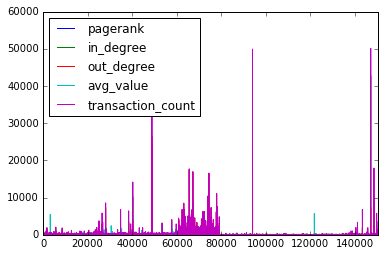

In [111]:
data = data.to_dataframe()
metrics = data[['pagerank', 'in_degree', 'out_degree', 'avg_value', 'transaction_count']]
metrics.plot()
plt.show()

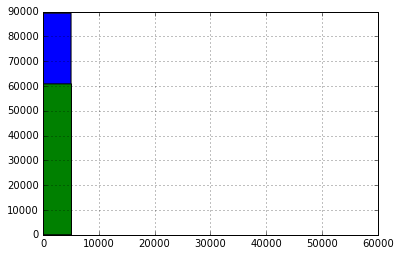

In [112]:
data.groupby('is_finance').transaction_count.hist(alpha=0.1)
plt.show()

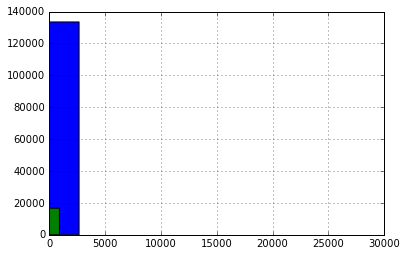

In [113]:
data.groupby('is_gambler').out_degree.hist(alpha=0.4)
plt.show()

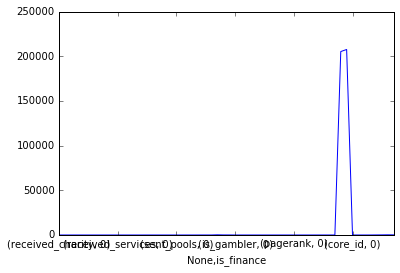

In [114]:
data.groupby(['is_finance']).mean().unstack().plot()